# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rizka Salisa Puteri
- **Email:** a180xbm440@devacademy.id
- **ID Dicoding:** a180xbm440


## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan hari libur berdasarkan jam peminjaman?
- Bagaimana perbedaan pola penyewaan sepeda oleh pengguna casual dan registered pada jam hari kerja dan hari libur?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

## Data Wrangling

### Gathering Data

In [2]:
day_df= pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df= pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada tahapan ini dilakukan gathering data untuk memuat tabel yang akan digunakan menjadi sebuah DataFrame, yaitu menggunakan tabel data `day_df` dan `hour_df`.
- Tabel`day_df` berisi data penyewaan sepeda per hari (total 731 hari).
- Tabel`hour_df`berisi data penyewaan sepeda per jam (total 17.379 jam).
- Kedua tabel tersebut memiliki kolom yang sama, kecuali "hr" (jam), yang hanya ada di tabel`hour_df`

### Assessing Data

##### Menilai Tabel `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
Ada kesalahan tipe data pada kolom dteday di data day_df. Kolom ini memiliki tipe data object dan seharusnya diubah ke datetime64

#### Menilai Tabel `hour_df`

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Ada kesalahan tipe data pada kolom dteday di tabel `hour_df`. Kolom ini awalnya bertipe object dan seharusnya diubah ke datetime64.


### Cleaning Data

#### Membersihkan Tabel `day_df`

**Memperbaiki Tipe Data**

In [12]:
date_col = ["dteday"]
for col in date_col:
    day_df[col] = pd.to_datetime(day_df[col])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

  **Mengubah Nilai Kolom**

In [14]:
# Dictionary untuk mengganti nilai
season_dict = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
year_dict = {0: "2011", 1: "2012"}
weekday_dict = {
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
    4: "Thursday", 5: "Friday", 6: "Saturday"
}

# Menggunakan .replace() pada day_df
day_df["season"] = day_df["season"].replace(season_dict)
day_df["yr"] = day_df["yr"].replace(year_dict)
day_df["weekday"] = day_df["weekday"].replace(weekday_dict)

# Cetak hasil
print(day_df[["yr", "weekday","season"]].head())


     yr    weekday  season
0  2011   Saturday  Spring
1  2011     Sunday  Spring
2  2011     Monday  Spring
3  2011    Tuesday  Spring
4  2011  Wednesday  Spring


**Insight:**
- Tipe data pada kolom `dteday` di tabel `day_df ` telah dikonversi menjadi tipe data datetime64
- Melakukan perubahan nilai tabel `day_df` pada kolom `season`, `yr`, `mnth`, `weekday`


#### Membersihkan Tabel `hour_df`

**Memperbaiki Tipe Data**

In [15]:
date_cols = ["dteday"]
for col in date_cols:
    hour_df[col] = pd.to_datetime(hour_df[col])

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Mengubah Nilai Kolom**

In [17]:
# Dictionary untuk mengganti nilai
season_dict = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
year_dict = {0: "2011", 1: "2012"}
weekday_dict = {
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
    4: "Thursday", 5: "Friday", 6: "Saturday"
}

# Menggunakan .replace() pada hour_df
hour_df["season"] = hour_df["season"].replace(season_dict)
hour_df["yr"] = hour_df["yr"].replace(year_dict)
hour_df["weekday"] = hour_df["weekday"].replace(weekday_dict)

# Cetak hasil
print(hour_df[["yr", "weekday", "season"]].head())



     yr   weekday  season
0  2011  Saturday  Spring
1  2011  Saturday  Spring
2  2011  Saturday  Spring
3  2011  Saturday  Spring
4  2011  Saturday  Spring


**Insight:**
- Melakukan perubahan tipe data kolom `dteday` dari `object `menjadi `datetime64` pada tabel` day_df`
- Melakukan perubahan nilai tabel `hour_df` pada kolom `season`, `yr`, `mnth`, `weekday`


## Exploratory Data Analysis (EDA)

#### Eksplorasi Data `day_df`

In [18]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,NaN,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,6.519836,0.028728,NaN,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,1.000000,0.000000,NaN,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,4.000000,0.000000,NaN,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,7.000000,0.000000,NaN,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,10.000000,0.000000,NaN,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,12.000000,1.000000,NaN,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
Dataset `day_df` berisi data penyewaan sepeda harian dari 1 Januari 2011 hingga 31 Desember 2012.Jumlah penyewaan sepeda per hari rata-rata 4504 unit, dengan jumlah tertinggi mencapai `8714` unit dan terendah hanya` 22` unit.

In [19]:
weathersit_count = day_df.groupby('weathersit').instant.nunique().reset_index()
weathersit_count.rename(columns={'instant': 'sum'}, inplace=True)
weathersit_count.head(10)

,weathersit,sum
0,1,463
1,2,247
2,3,21


#### Eksplorasi Data `hour_df`

In [20]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,NaN,NaN,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,NaN,NaN,NaN,2512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,6.537775,11.546752,0.028770,NaN,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,1.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,4.000000,6.000000,0.000000,NaN,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,7.000000,12.000000,0.000000,NaN,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,10.000000,18.000000,0.000000,NaN,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,12.000000,23.000000,1.000000,NaN,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:** Dataset hour_df berisi data penyewaan sepeda per jam dengan total 17.379 entri, mencakup periode dari 1 Januari 2011 hingga 31 Desember 2012.  Rata-rata jumlah penyewaan sepeda per jam adalah 189 unit, dengan nilai tertinggi mencapai 977 unit dalam satu jam tertentu.

**Eksplorasi pola penyewaan sepeda pada hari kerja dan hari libur**


In [21]:
hour_df.groupby(["workingday", "hr"]).agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
}).sort_values(by=("cnt", "sum"), ascending=False)


instant     cnt                                 
              nunique     sum  max min        mean         std
workingday hr                                                 
1          17     499  262120  976  26  525.290581  228.761046
           18     498  245129  977  26  492.226908  220.258168
           8      496  236595  839  31  477.006048  186.153760
           19     498  173504  743  18  348.401606  160.490857
           16     499  146268  634  13  293.122244  132.798845
           7      496  144144  596  18  290.612903  134.558250
           20     498  124360  567  23  249.718876  120.340635
           9      496  119793  426  23  241.518145   85.705861
           15     498  100263  601  13  201.331325   97.639817
           12     497   99808  471   3  200.820926   89.264976
           13     498   98818  428  11  198.429719   88.476850
           21     498   92771  398   6  186.287149   87.831120
           14     498   91419  651  12  183.572289   87.257014
0          13     231   86101  760  30  372.731602  177.965646
           12     231   84606  776  32  366.259740  174.875588
           14     231   84233  750  23  364.645022  172.343904
           15     231   82886  750   7  358.813853  169.101654
           16     231   81480  783  11  352.727273  171.593146
1          11     496   78482  361  10  158.229839   69.173911
0          17     231   74740  731  15  323.549784  174.111773
           11     231   72838  663  27  315.316017  155.250792
1          22     498   68918  321  11  138.389558   67.549347
           10     496   67142  275   8  135.366935   55.679335
0          18     230   64643  676  23  281.056522  155.806709
           10     231   59115  539  12  255.909091  127.844251
           19     230   53285  554  11  231.673913  130.688879
1          6      496   50840  213   7  102.500000   45.812662
           23     498   44177  256   9   88.708835   48.857465
0          20     230   40190  551  11  174.739130  100.854609
           9      231   39645  397  14  171.623377   92.515104
           21     230   32674  584   7  142.060870   86.649299
           22     230   26694  502   9  116.060870   72.682811
           8      231   24406  597   5  105.653680   74.338249
           0      230   20884  249   6   90.800000   48.692727
           23     230   19764  239   2   85.930435   54.971644
1          0      496   18246  283   2   36.786290   24.467143
0          1      230   15987  168   4   69.508696   36.549152
1          5      495   12332   66   1   24.913131   12.281389
0          2      228   12123  132   2   53.171053   27.852691
           7      231   10027  387   1   43.406926   37.794625
1          1      494    8177  114   1   16.552632   11.680338
0          3      227    5851   79   2   25.775330   14.893062
           6      229    4292  133   1   18.742358   16.064535
1          2      487    4229   74   1    8.683778    6.563915
           4      470    2552   17   1    5.429787    3.129468
           3      470    2323   36   1    4.942553    3.403074
0          5      222    1929   55   1    8.689189    6.698941
           4      227    1876   28   1    8.264317    5.207271

**Insight:**
- Di hari kerja, penyewaan sepeda banyak terjadi pada pukul `17.00` dengan total `26.210 `peminjaman, diikuti jumlah peminjaman terbanyak kedua yaitu pada pukul.
`18.00` dengan total peminjaman sebesar `245129`. Total peminjaman paling banyak terjadi pada jam 17.00-18.00 kemungkinan dikarenakan sepeda banyak digunakan untuk pulang kerja/sekolah.
- Jam sibuk lainnya pada hari kerja yaitu pukul `08.00` pagi dengan total `23.659` (paling banyak ke-3), yang kemungkinan besar berkaitan dengan mobilitas masyarakat yang berangkat kerja/sekolah.
- Aktivitas penyewaan sepeda di hari libur lebih merata dibanding hari kerja, dengan jumlah peminjaman yang cukup tinggi juga terjadi pada pukul `14:00 `hingga `16.00`.
- Perbedaan utama antara hari kerja dan hari libur terletak pada waktu puncak peminjaman. Di hari kerja, penyewaan sepeda paling ramai di pagi dan sore, kemungkinan terkait aktivitas berangkat dan pulang kerja. Sementara itu, di hari libur, penyewaan lebih merata dan meningkat pada siang hingga sore kemungkinan penggunaan untuk rekreasi.


**Eksplorasi pola penyewaan sepeda antara pengguna kasual dan terdaftar pada hari kerja dan hari libur**

In [22]:
hourly_rentals = hour_df.groupby(["hr", "workingday"]).agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()

hourly_rentals["total"] = hourly_rentals["casual"] + hourly_rentals["registered"]
hourly_rentals = hourly_rentals.sort_values(by="total", ascending=False)
hourly_rentals.head()

,hr,workingday,casual,registered,total
35,17,1,28391,233729,262120
37,18,1,25125,220004,245129
17,8,1,11043,225552,236595
39,19,1,20429,153075,173504
33,16,1,24124,122144,146268


**Insight** :
Jumlah penyewaan sepeda tertinggi terjadi pada jam 17.00–18.00, dengan mayoritas penyewa merupakan pengguna terdaftar (registered) yang kemungkinan besar menggunakannya untuk perjalanan rutin dari kantor atau tempat kerja. Selain itu, jumlah penyewaan juga cukup tinggi pada pukul 08:00, yang bertepatan dengan jam berangkat kerja, meskipun jumlahnya masih lebih rendah dibandingkan dengan sore hari.


In [23]:
weekend_rentals = hourly_rentals[hourly_rentals["workingday"] == 0]
weekend_rentals.head()

,hr,workingday,casual,registered,total
26,13,0,31514,54587,86101
24,12,0,29163,55443,84606
28,14,0,32246,51987,84233
30,15,0,31532,51354,82886
32,16,0,29710,51770,81480


**Insight :** Pada hari libur, penyewaan sepeda paling banyak terjadi pada siang hingga sore hari, yaitu sekitar pukul 12.00 - 14.00. Dibandingkan hari kerja, lebih banyak pengguna kasual yang menyewa sepeda, meskipun pengguna terdaftar tetap lebih dominan. Hal ini menunjukkan pada hari libur, sepeda lebih sering digunakan untuk kegiatan santai. Dengan kata lain, penyewaan sepeda di hari libur lebih fleksibel dan tidak terikat pada jadwal rutin.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan hari libur berdasarkan jam peminjaman?###

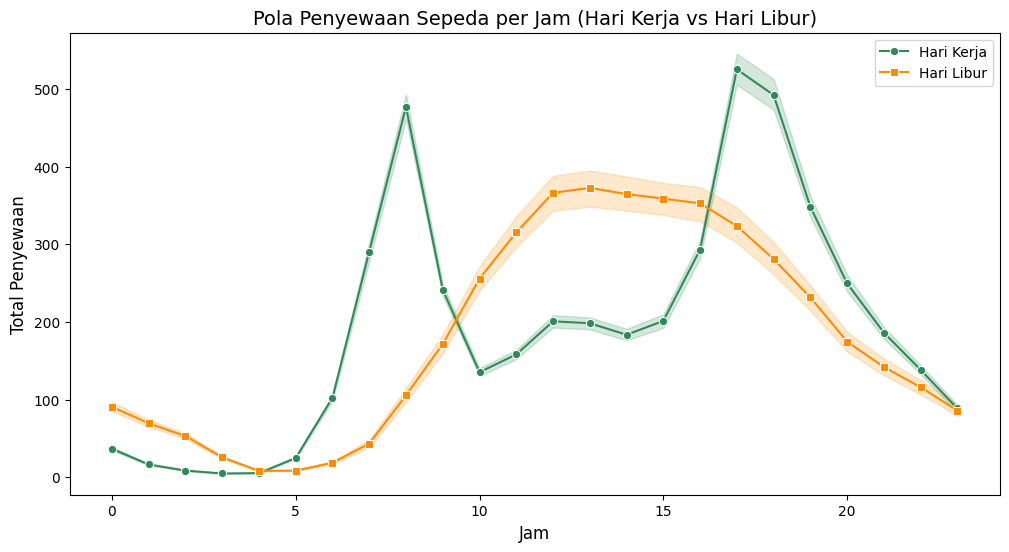

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data=hour_df[hour_df["workingday"] == 1],
    x="hr", y="cnt",
    label="Hari Kerja", ax=ax, marker="o", color="seagreen"
)
sns.lineplot(
    data=hour_df[hour_df["workingday"] == 0],
    x="hr", y="cnt",
    label="Hari Libur", ax=ax, marker="s", color="darkorange"
)
ax.set_title("Pola Penyewaan Sepeda per Jam (Hari Kerja vs Hari Libur)", fontsize=14)
ax.set_xlabel("Jam", fontsize=12)
ax.set_ylabel("Total Penyewaan", fontsize=12)
ax.legend()

plt.show()


Insight :

Pada hari kerja, terdapat dua lonjakan signifikan pada jam sibuk, yaitu pagi (sekitar pukul 8) dan sore (sekitar pukul 17-18), yang kemungkinan besar mencerminkan penggunaan sepeda untuk perjalanan kerja atau sekolah.
Pada akhir pekan, pola penyewaan lebih merata sepanjang hari, dengan puncak yang lebih landai di siang hingga sore hari, menunjukkan bahwa penggunaan sepeda lebih terkait dengan aktivitas santai atau liburan.

### Pertanyaan 2: Bagaimana pola penyewaan sepeda oleh pengguna casual dan registered berdasarkan jam pada hari kerja dan hari libur?


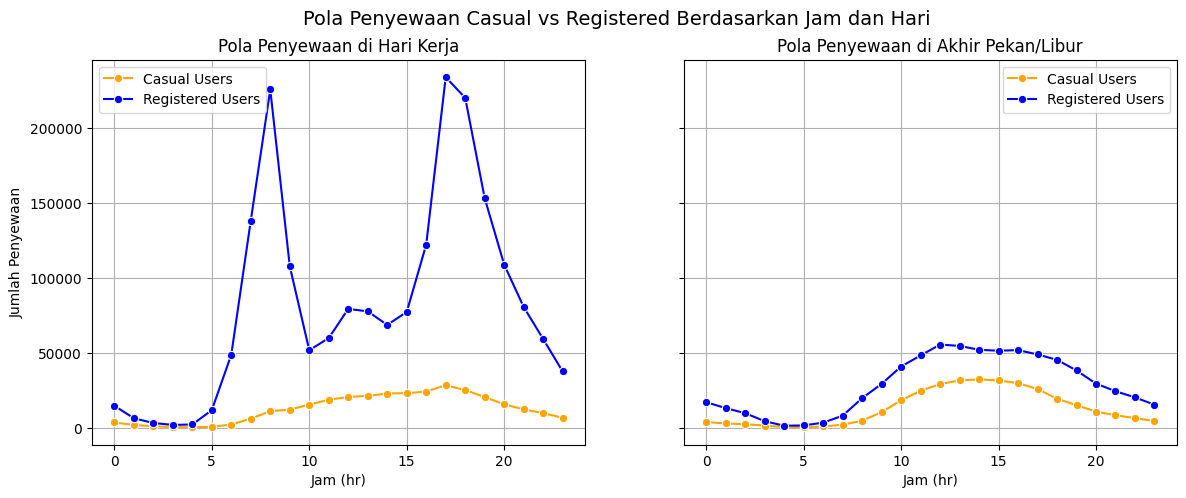

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Hari kerja (workingday = 1)
sns.lineplot(ax=axes[0], x="hr", y="casual", data=hourly_rentals[hourly_rentals["workingday"] == 1],
             label="Casual Users", color="orange", marker="o")
sns.lineplot(ax=axes[0], x="hr", y="registered", data=hourly_rentals[hourly_rentals["workingday"] == 1],
             label="Registered Users", color="blue", marker="o")
axes[0].set_title("Pola Penyewaan di Hari Kerja")
axes[0].set_xlabel("Jam (hr)")
axes[0].set_ylabel("Jumlah Penyewaan")
axes[0].legend()
axes[0].grid(True)

# Hari Libur (workingday = 0)
sns.lineplot(ax=axes[1], x="hr", y="casual", data=hourly_rentals[hourly_rentals["workingday"] == 0],
             label="Casual Users", color="orange", marker="o")
sns.lineplot(ax=axes[1], x="hr", y="registered", data=hourly_rentals[hourly_rentals["workingday"] == 0],
             label="Registered Users", color="blue", marker="o")
axes[1].set_title("Pola Penyewaan di Akhir Pekan/Libur")
axes[1].set_xlabel("Jam (hr)")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("Pola Penyewaan Casual vs Registered Berdasarkan Jam dan Hari", fontsize=14)
plt.show()



**Insight :**

- Pola Penyewaan Hari Kerja : Pengguna terdaftar cenderung menggunakan sepeda untuk perjalanan kerja/sekolah dengan pola yang teratur (jam sibuk pagi & sore).
Sementara itu, pengguna kasual menyewa sepeda lebih bebas tanpa pola waktu yang jelas.
- Pola penyewaan Hari Libur : Penyewaan sepeda lebih merata sepanjang hari, dengan lebih banyak pengguna kasual. Sementara itu, pengguna terdaftar tetap menyewa sepeda, tapi tidak mengalami lonjakan seperti di jam sibuk hari kerja.









## Analisis Lanjutan (Opsional)

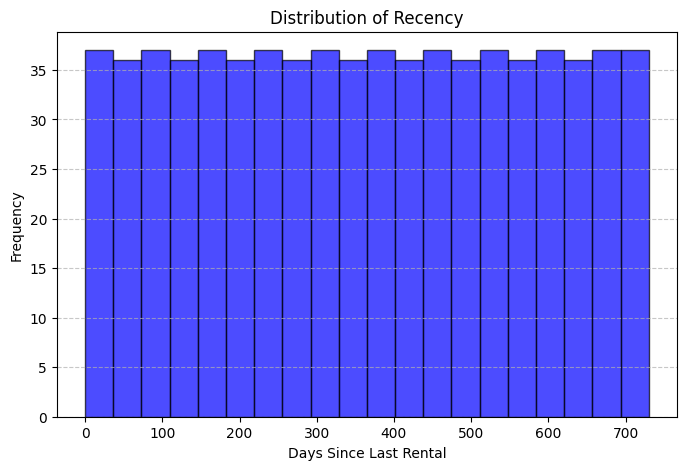

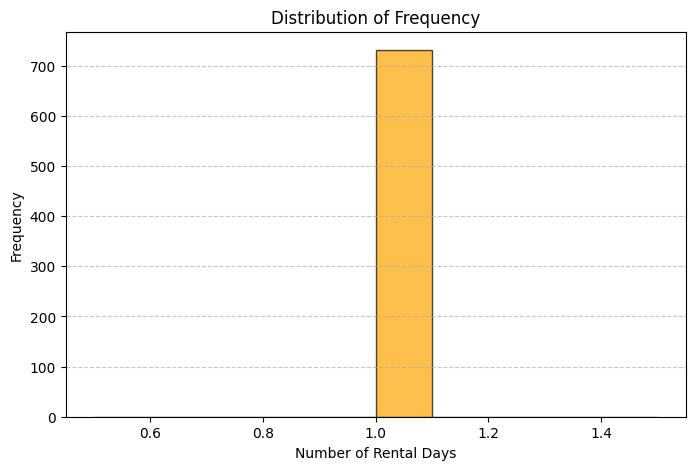

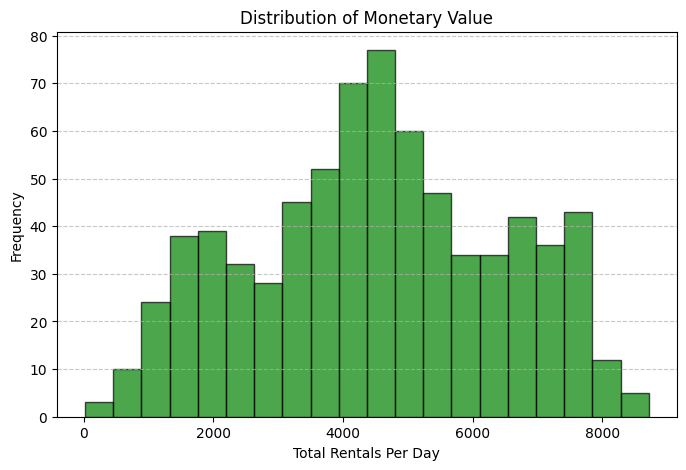

In [65]:
# Menghitung Recency (berapa hari sejak transaksi terakhir)
latest_date = day_df['dteday'].max()  # Ambil tanggal terbaru dalam dataset
day_df['Recency'] = (latest_date - day_df['dteday']).dt.days

# Menghitung Frequency (jumlah hari pelanggan menggunakan layanan)
rfm_df = day_df.groupby('dteday').agg(
    Frequency=('cnt', 'count')
).reset_index()

# Menghitung Monetary (total penyewaan sepeda per hari)
rfm_df['Monetary'] = day_df.groupby('dteday')['cnt'].sum().values

# Menggabungkan dengan Recency
rfm_df = rfm_df.merge(day_df[['dteday', 'Recency']], on='dteday', how='left')

# Visualisasi distribusi Recency
plt.figure(figsize=(8,5))
plt.hist(rfm_df['Recency'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Recency')
plt.xlabel('Days Since Last Rental')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualisasi distribusi Frequency
plt.figure(figsize=(8,5))
plt.hist(rfm_df['Frequency'], bins=10, color='orange', alpha=0.7, edgecolor='black')
plt.title('Distribution of Frequency')
plt.xlabel('Number of Rental Days')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualisasi distribusi Monetary
plt.figure(figsize=(8,5))
plt.hist(rfm_df['Monetary'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribution of Monetary Value')
plt.xlabel('Total Rentals Per Day')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Hasil **RFM Analysis** menunjukkan bahwa penyewaan sepeda memiliki distribusi **Recency** yang merata, menandakan bahwa transaksi terjadi secara konsisten setiap hari tanpa periode yang terlalu lama tanpa penyewaan. **Frequency** tidak bervariasi karena setiap hari dianggap satu transaksi, sesuai dengan struktur data harian. Sementara itu, **Monetary** menunjukkan distribusi yang bervariasi, dengan sebagian besar hari memiliki jumlah penyewaan antara 2.000 hingga 6.000 unit, dan beberapa hari mencapai lebih dari 8.000 unit, mencerminkan tren penggunaan yang dipengaruhi oleh faktor eksternal seperti cuaca, musim, dan hari kerja.

##Conclusion


- Conclusion 1 : Perbedaan pola penyewaan sepeda antara hari kerja dan hari libur terlihat dari jam peminjaman. Pada hari kerja, penyewaan sepeda mengalami dua lonjakan utama, yaitu pada pagi hari sekitar pukul 08.00 dan sore hari sekitar pukul 17.00-18.00. Hal ini menunjukkan bahwa sepeda lebih sering digunakan untuk keperluan transportasi, seperti perjalanan ke tempat kerja atau sekolah. Sementara itu, pada akhir pekan, pola penyewaan lebih merata sepanjang hari, dengan puncak yang lebih landai terjadi dari siang hingga sore hari. Pola ini mengindikasikan bahwa penggunaan sepeda lebih berkaitan dengan aktivitas santai atau rekreasi dibandingkan dengan mobilitas harian.


- Conclusion 2 : Pada hari kerja, penyewaan sepeda menunjukkan pola dengan dua lonjakan utama, yaitu pada pagi hari sekitar pukul 07:00 - 09:00 dan sore hari sekitar pukul 17:00 - 19:00. Pola ini mengindikasikan bahwa banyak pengguna memanfaatkan sepeda sebagai moda transportasi untuk pergi dan pulang kerja. Sementara itu, pengguna casual memiliki pola penyewaan yang lebih stabil sepanjang hari, dengan sedikit peningkatan pada siang hari, yang menunjukkan bahwa mereka lebih cenderung menggunakan sepeda untuk keperluan santai daripada kebutuhan komuter. Pada akhir pekan atau hari libur, penyewaan sepeda lebih merata tanpa lonjakan signifikan pada jam tertentu. Pengguna casual mengalami peningkatan penyewaan pada siang hingga sore hari, sekitar pukul 09:00 - 17:00, yang mengindikasikan bahwa mereka lebih banyak menyewa sepeda untuk keperluan rekreasi.